### Sinusoidal

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import torch.nn as nn


class SinusoidalPositionalEmbedding(nn.Module):
    def __init__(self, embedding_dim):
        super().__init__()
        self.embedding_dim = embedding_dim

    def forward(self, timesteps):
        positions = np.arange(timesteps)[:, np.newaxis]  # Shape: (timesteps, 1)
        dimensions = np.arange(self.embedding_dim)[
            np.newaxis, :
        ]  # Shape: (1, embedding_dim)

        # Compute angles using sine for even indices and cosine for odd indices
        angle_rates = 1 / np.power(10000, (2 * (dimensions // 2)) / self.embedding_dim)
        angle_rads = positions * angle_rates

        pos_encoding = np.zeros_like(angle_rads)
        pos_encoding[:, 0::2] = np.sin(angle_rads[:, 0::2])
        pos_encoding[:, 1::2] = np.cos(angle_rads[:, 1::2])
        return pos_encoding

In [9]:
def main():
    embedding_dim = 512  # Match embedding dimension from the reference
    timesteps = 1000  # Number of rows (timesteps)

    # Generate Embeddings
    embedding = SinusoidalPositionalEmbedding(embedding_dim)
    embeddings = embedding(timesteps)  # Shape: [timesteps, embedding_dim]

    # Plot Heatmap
    plt.figure(figsize=(10, 6))
    plt.imshow(embeddings, aspect="auto", cmap="RdBu")
    plt.colorbar(label="Embedding Value")
    plt.title("{0}-Dimensional Positional Encoding Heatmap".format(embedding_dim))
    plt.xlabel("Embedding Dimension: {0}".format(embedding_dim))
    plt.ylabel("Position (Timestep): {0}".format(timesteps))
    plt.show()

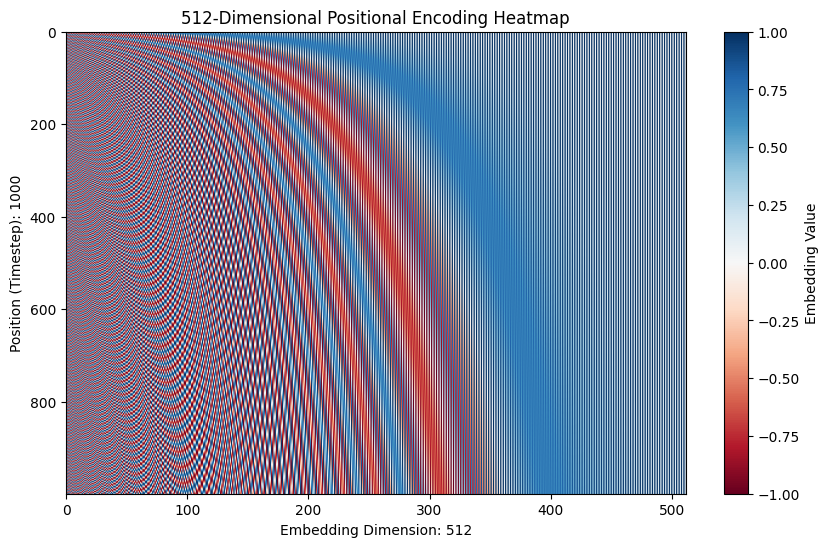

In [10]:
if __name__ == "__main__":
    main()